## I-94 Traffic Dataset Analysis Project
> The goal of our project is to determine a few **indicators** of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

© Harison Nagisvaran

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()
print('\n')


In [3]:
traffic.tail()


holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954

In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <a list of 10 Patch objects>)

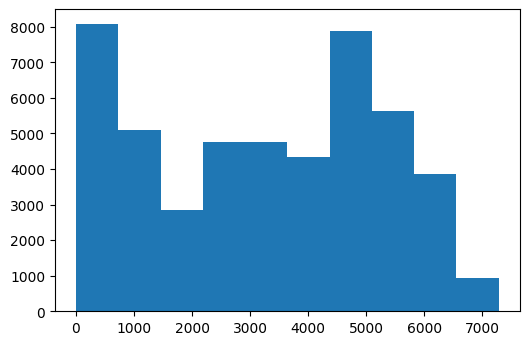

In [5]:
plt.hist(traffic['traffic_volume'])

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

# Time Indicators
### Traffic Volume: Day vs. Night
I will start by dividing the dataset into two parts:

>Daytime data: hours from 7 AM to 7 PM (12 hours)

>Nighttime data: hours from 7 PM to 7 AM (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
a = traffic['date_time'].dt.hour
day = traffic[(a>=7) & (a<19)]
night = traffic[(a>= 19) | (a <7)]
print(a.shape)
print(day.shape)
print(night.shape)

(48204,)
(23877, 9)
(24327, 9)


Now, I want to plot two histograms of traffic volume side by side(day vs night) by using a grid chart.

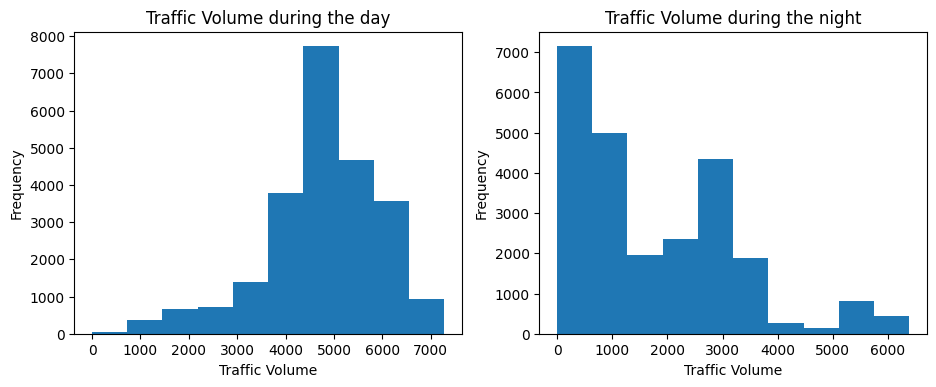

In [8]:
plt.figure(figsize =(11,4))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume during the day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume during the night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Evidently,the day traffic has has left-skewed distribution, while the night traffic is right skewed. 

75% of time traffic volume - more then 4252 cars per hour, while during the night - less then 2819.

We can say that time of the day is one of the factors which influence  traffic volume and during the night we can call traffic situation light rather then heavy. So, to proceed with further traffic indicators, it makes sence to focus on daytime.

As we decided to focus only on daytime we will work with `Traffic_daytime` part of the dataset. Now let's analyse time indicators: there might be more people on the road in a certain month, on a certain day of the week, or at a certain time of the day.

<ipython-input-11-db769dadf89b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



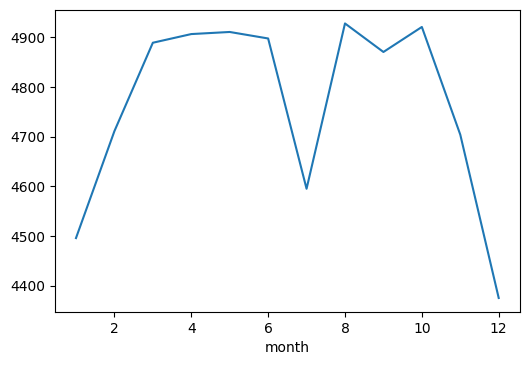

In [11]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()

plt.show()

Distribution illustrates a high traffic volume during months of March-June and August to October. In july, there is a significant drop in traffic volume.

<ipython-input-12-b820bda24c2d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



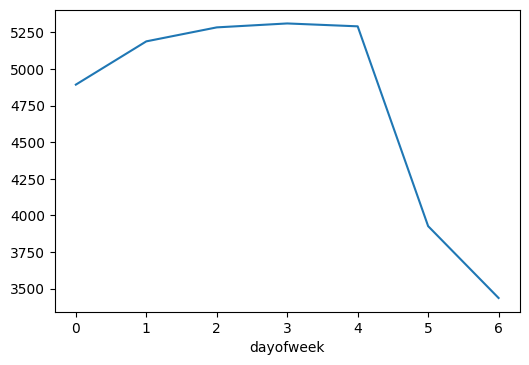

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show() 

Since 0 is Monday and 6 is Sunday,clearly, traffic volume on business days are much heavier than on weekends.

<ipython-input-13-92007b64761a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



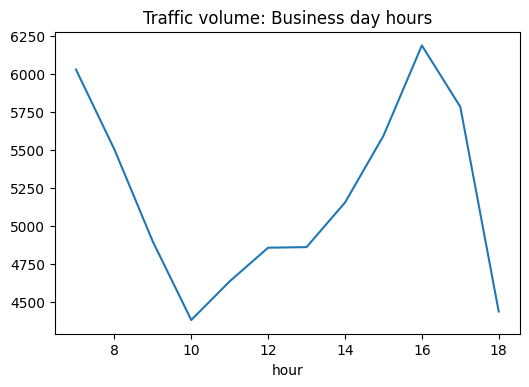

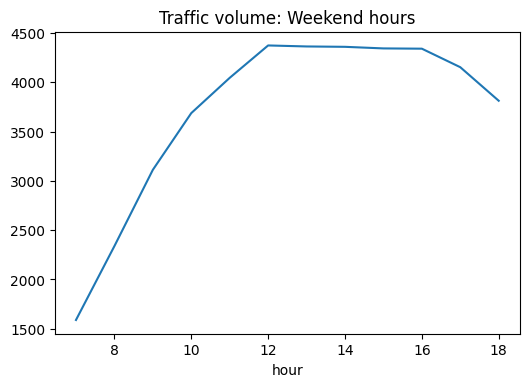

In [13]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic volume: Business day hours')
plt.show()
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic volume: Weekend hours')
plt.show()

Overall on a hour basis, the traffic volume is generally higher during business days compared to the weekends. Clearly the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

## Weather Indicators

Now, I will examine other indicators of heavy traffic - weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

In [14]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather column with the strongest correlation is `temp`.

(240.0, 320.0)

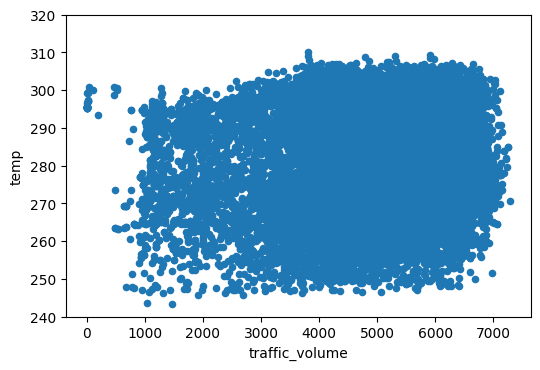

In [15]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(240,320)

From the scatter plot, we can conclude that temperature doesn't look like a strong indicator of heavy traffic.

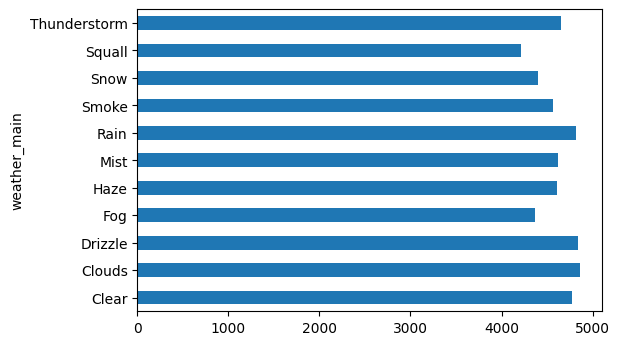

In [16]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()

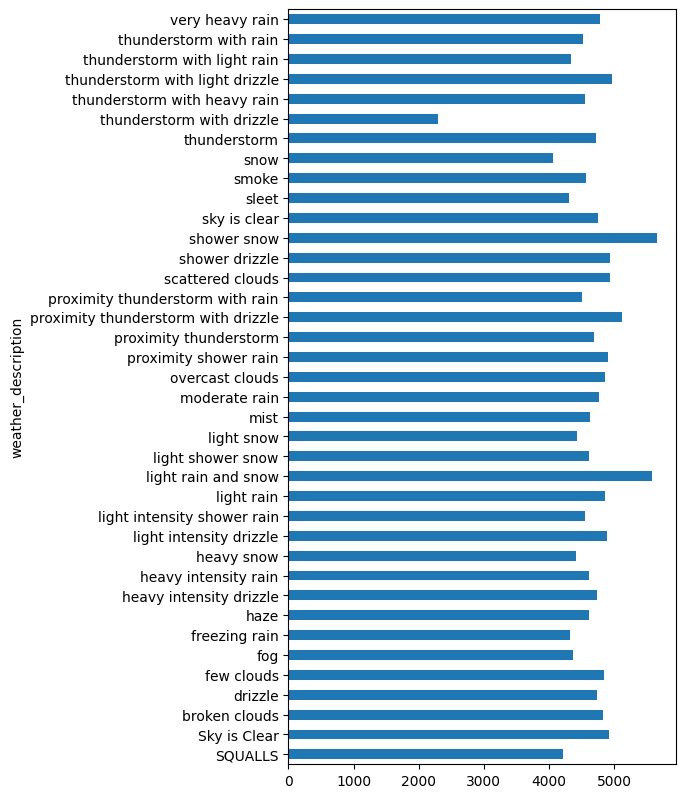

In [17]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It appears that there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

### Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

**Time indicators**
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

- The traffic is usually heavier on business days compared to the weekends.

- On business days, the rush hours are around 7 and 16.


**Weather indicators**

- Shower snow

- Light rain and snow

- Proximity thunderstorm with drizzle